In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../datasets/students_simple.csv')
df.head()

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


In [16]:
data = df.iloc[:, [0,4]]
data.head()

,height,pages
0,159,24
1,160,32
2,161,24
3,162,24
4,162,60


Корреляция Пирсона (r) измеряет линейную связь между двумя непрерывными числовыми переменными. Она показывает, насколько изменения в одной переменной (height) предсказуемо связаны с изменениями в другой (pages) по прямой линии. Значение от -1 (идеальная отрицательная связь) до +1 (идеальная положительная). 0 — нет связи.

Формула:
$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $
Где:

$ x_i, y_i $ — значения пары.
$ \bar{x}, \bar{y} $ — средние.
Это ковариация, нормированная на стандартные отклонения.

In [17]:
height = data['height']
pages = data['pages']

In [18]:
r, p = stats.pearsonr(height, pages)

In [19]:
print(r)
print(p)

0.3624034903219168
0.1163473817480292


умеренная положительная линейная связь (рост растёт — pages растут)

P=0.116 >0.05 — не значима (может быть случайной)

Посчитала корреляцию и p-value (вероятность того, что зависимость между данными случайна)

z-трансформация Фишера (Fisher's z-transformation) — это математический метод, который преобразует коэффициент корреляции Пирсона (r) в переменную z, имеющую нормальное распределение. Она используется в статистике, чтобы упростить анализ корреляций, особенно при вычислении доверительных интервалов или сравнении корреляций.

In [20]:
z = np.arctanh(r)
n = len(height)
se_z = 1 / np.sqrt(n - 3)

In [21]:
z_critical = 1.96
ci_lower_z = z - z_critical * se_z 
ci_upper_z = z + z_critical * se_z  
ci_lower_r = np.tanh(ci_lower_z)  
ci_upper_r = np.tanh(ci_upper_z) 

Интервал показывает диапазон истинного r с вероятность 95%

In [22]:
print(f"z-трансформация: {z:.4f}")
print(f"Стандартная ошибка z: {se_z:.4f}")
print(f"95% ДИ в z-пространстве: [{ci_lower_z:.4f}, {ci_upper_z:.4f}]")
print(f"95% ДИ для r: [{ci_lower_r:.4f}, {ci_upper_r:.4f}]")

z-трансформация: 0.3797
Стандартная ошибка z: 0.2425
95% ДИ в z-пространстве: [-0.0957, 0.8550]
95% ДИ для r: [-0.0954, 0.6937]


диапазон включает 0 => корреляция может быть нулевой

Коррелция Фeхнера (не требует нормальности данных) - это простая непараметрическая корреляция на основе знаков отклонений от медианы.Коэффициент корреляции Фехнера — это показатель, который измеряет степень согласованности НАПРАВЛЕНИЙ отклонений значений двух величин от их средних значений. <br>
В то время как коэффициент корреляции Пирсона измеряет только линейную связь между переменными, коэффициент Фехнера оценивает согласованность направлений отклонений, что делает его полезным для выявления нелинейных зависимостей. 


In [23]:
med_x = np.median(height)
med_y = np.median(pages)
sign_x = np.sign(height - med_x)
sign_y = np.sign(pages - med_y)
non_zero = (sign_x != 0) & (sign_y != 0)
agreed = np.sum(sign_x[non_zero] == sign_y[non_zero])  # Согласованные пары, одинаковые данные
disagreed = np.sum(sign_x[non_zero] != sign_y[non_zero])  # Несогласованные, знаки разные
fechner = (agreed - disagreed) / (agreed + disagreed) if (agreed + disagreed) > 0 else 0
print(f"Корреляция Фехнера: {fechner:.3f}")

Корреляция Фехнера: 0.400


Корреляция спирмена . Непараметрическая версия Пирсона, но на рангах (порядковых номерах). Измеряет монотонную связь

In [24]:
spearman_r, spearman_p = stats.spearmanr(height, pages)
print(f"Корреляция Спирмена: {spearman_r:.3f}, p-value: {spearman_p:.3f}")

Корреляция Спирмена: 0.458, p-value: 0.042


r=0.458 — умеренная положительная монотонная связь <br>
P < 0.05 => связь значима

Корреляция Кенделла. Ещё одна непараметрическая на рангах, но фокусируется на парах: сколько пар согласуются/несогласуются в порядке.

In [25]:
kendall_r, kendall_p = stats.kendalltau(height, pages)
print(f"Корреляция Кенделла: {kendall_r:.3f}, p-value: {kendall_p:.3f}")

Корреляция Кенделла: 0.332, p-value: 0.054


P=0.054 ≈0.05 — на грани значимости. Подтверждает Спирмена: порядок в данных согласуется.

Гистограммы

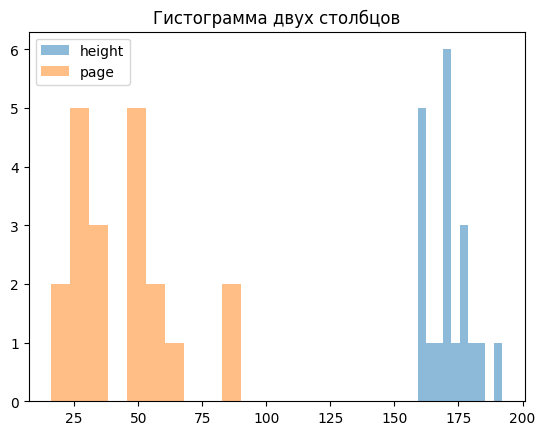

In [31]:
plt.hist(df['height'], bins=10, alpha=0.5, label='height')
plt.hist(df['pages'], bins=10, alpha=0.5, label='page')
plt.legend()
plt.title("Гистограмма двух столбцов")
plt.show()

График рассеяния

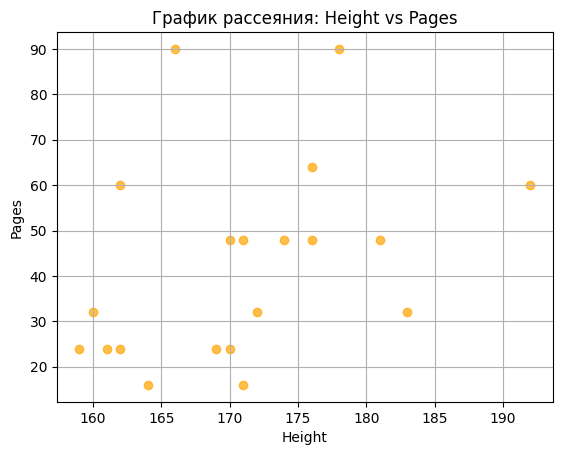

In [32]:
plt.scatter(df['height'], df['pages'], color='orange', alpha=0.7)
plt.title('График рассеяния: Height vs Pages')
plt.xlabel('Height')
plt.ylabel('Pages')
plt.grid(True)
plt.show()

Каждая точка - это наблюдаема пара значений (Height, Pages). График показывает, как изменяется Pages в зависимости от значений Height (или отсутствие связи). В моём случае точки разбросаны весьма хаотично, без явно выраженной наклонной линии и тд. Есть несколько выбросов ( точки с средним значение height  и большим значением pages). Между pages и height не очевидной линейной зависимости 

In [33]:
x = df['height'].values
y = df['pages'].values

<h2>Линейная регрессия</h2>

y=w1​x+w0 <br>
w1​=∑(x−xˉ)2∑(x−xˉ)(y−yˉ​)<br>
w0​=yˉ​−w1​xˉ

In [34]:
x_mean = np.mean(x)
y_mean = np.mean(y)

w1_lin = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
w0_lin = y_mean - w1_lin * x_mean

y_pred_lin = w1_lin * x + w0_lin

<h2>Квадратичная регрессия</h2>

y=w2​x2+w1​x+w0 можно найти коэф через слау

In [35]:
X_quad = np.vstack([x**2, x, np.ones_like(x)]).T
w_quad = np.linalg.lstsq(X_quad, y, rcond=None)[0]  # [w2, w1, w0]

y_pred_quad = w_quad[0]*x**2 + w_quad[1]*x + w_quad[2]

<h2>Гиперболическая регрессия<h2>

y=xw1​​+w0 

In [36]:
X_hyp = np.vstack([1/x, np.ones_like(x)]).T
w_hyp = np.linalg.lstsq(X_hyp, y, rcond=None)[0]  # [w1, w0]

y_pred_hyp = w_hyp[0]/x + w_hyp[1]

<h2>Показательная (экспоненциальная) регрессия</h1>

ln(y)=ln(w1​)+w0​x

In [38]:
y_pos = y[y > 0]
x_pos = x[y > 0]

ln_y = np.log(y_pos)
X_exp = np.vstack([x_pos, np.ones_like(x_pos)]).T
w_exp = np.linalg.lstsq(X_exp, ln_y, rcond=None)[0]  # [w0, ln(w1)]

w0_exp = w_exp[0]
w1_exp = np.exp(w_exp[1])

y_pred_exp = w1_exp * np.exp(w0_exp * x_pos)


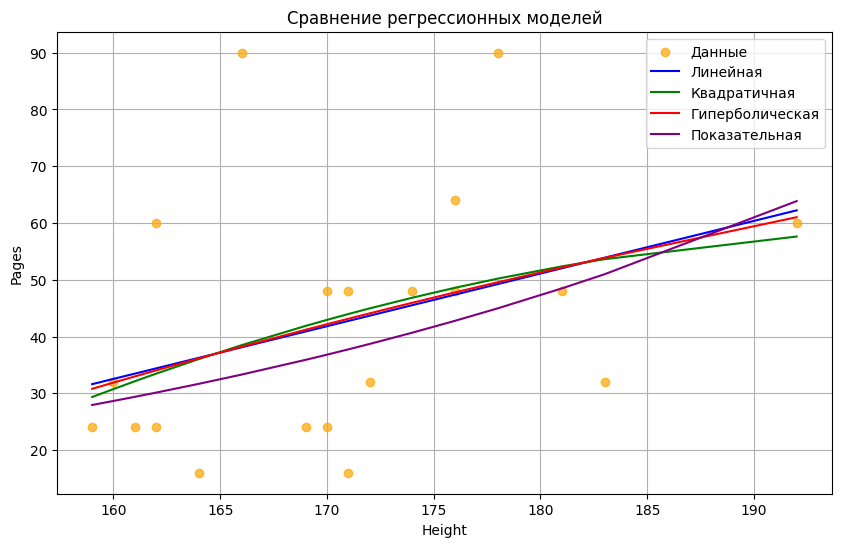

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='orange', label='Данные', alpha=0.7)

# Линейная
plt.plot(x, y_pred_lin, color='blue', label='Линейная')

# Квадратичная
plt.plot(x, y_pred_quad, color='green', label='Квадратичная')

# Гиперболическая
plt.plot(x, y_pred_hyp, color='red', label='Гиперболическая')

# Показательная
plt.plot(x_pos, y_pred_exp, color='purple', label='Показательная')

plt.xlabel('Height')
plt.ylabel('Pages')
plt.title('Сравнение регрессионных моделей')
plt.legend()
plt.grid(True)
plt.show()


MSE показывает, насколько в среднем предсказания модели отклоняются от реальных значений. ошибка возводится в квадрат

In [40]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_lin  = mse(y, y_pred_lin)
mse_quad = mse(y, y_pred_quad)
mse_hyp  = mse(y, y_pred_hyp)
mse_exp  = mse(y_pos, y_pred_exp)  # только для положительных y

print(f"Линейная: {mse_lin:.3f}")
print(f"Квадратичная: {mse_quad:.3f}")
print(f"Гиперболическая: {mse_hyp:.3f}")
print(f"Показательная: {mse_exp:.3f}")

Линейная: 398.925
Квадратичная: 396.564
Гиперболическая: 397.708
Показательная: 421.752


Лучшее уравнение регрессии - квадратичная. Худшее уравнение регрессии - показательная

Поверка критерия Фишера

Цель F-теста (в контексте регрессии) — проверить, есть ли у модели статистически значимая объясняющая способность в целом (т. е. модель лучше, чем просто константа).

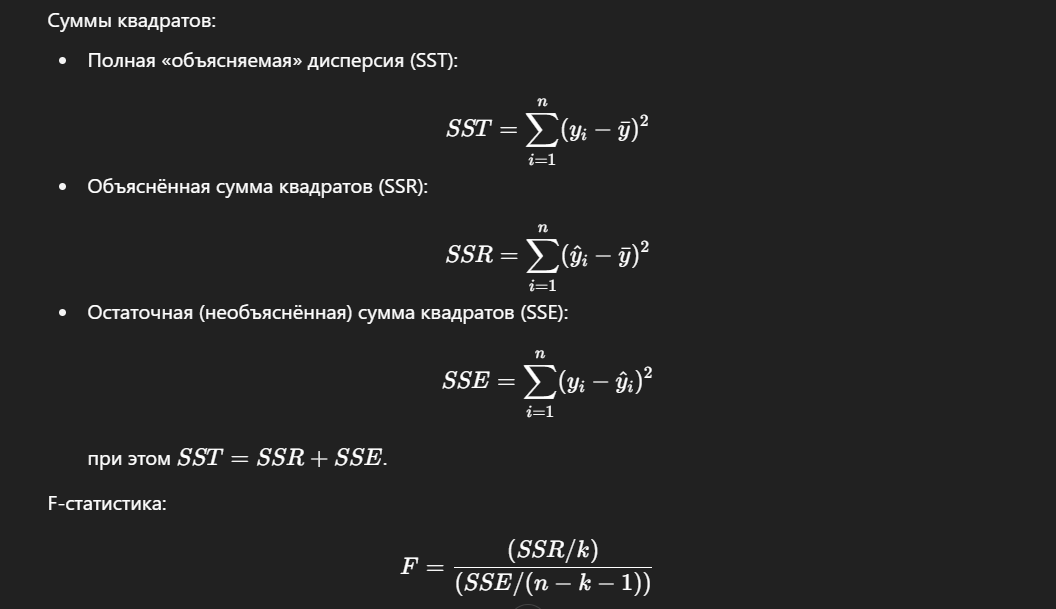

ритерий Фишера проверяет гипотезу:

𝐻0:
модель не объясняет данные лучше, чем просто среднее
𝐻1:модель значимо объясняет зависимость между x и y

Если p-value < 0.05 → модель статистически значима,

In [42]:
def f_test(y_true, y_pred, k):
    n = len(y_true)
    y_mean = np.mean(y_true)
    SSR = np.sum((y_pred - y_mean)**2)  # объяснённая сумма квадратов
    SSE = np.sum((y_true - y_pred)**2)  # остаточная сумма квадратов
    SST = np.sum((y_true - y_mean)**2)  # полная сумма квадратов
    
    MSR = SSR / k                      # средняя объяснённая
    MSE = SSE / (n - k - 1)            # средняя остаточная
    F = MSR / MSE                      # F-статистика
    p_value = stats.f.sf(F, k, n - k - 1)  # p-value

    return F, p_value, SSR, SSE, SST

F_quad, p_quad, SSR_quad, SSE_quad, SST_quad = f_test(y, y_pred_quad, k=2)

F_exp, p_exp, SSR_exp, SSE_exp, SST_exp = f_test(y_pos, y_pred_exp, k=1)

print(f"Квадратичная модель: F = {F_quad:.3f}, p = {p_quad:.4f}")
print(f"Показательная модель: F = {F_exp:.3f}, p = {p_exp:.4f}")

alpha = 0.05
print("\nИнтерпретация:")
print("Квадратичная модель — значима" if p_quad < alpha else "Квадратичная модель — незначима")
print("Показательная модель — значима" if p_exp < alpha else "Показательная модель — незначима")

Квадратичная модель: F = 1.343, p = 0.2873
Показательная модель: F = 3.934, p = 0.0628

Интерпретация:
Квадратичная модель — незначима
Показательная модель — незначима
